#📄 Rotten Tomatoes Movie Ratings Analysis – Project Documentation
#🧠 Overview
This project analyzes a dataset of movies from Rotten Tomatoes to extract insights about critic and audience ratings, genres, review counts, and trends over time. The dataset is explored and visualized to identify patterns and correlations using Python libraries such as pandas, matplotlib, and seaborn.

#📦 Dataset
Source: rotten_tomatoes_movies.csv

Encoding: latin-1

Key Columns:

tomatometer_rating

audience_rating

tomatometer_count

audience_count

runtime

genres

original_release_date

#🛠️ Steps & Methodology
#1. Data Loading
Load the CSV file using pandas.

Handle file not found, encoding, or parsing issues with error handling.

#2. Data Exploration
Inspect data types and dimensions.

Identify missing values and calculate their percentage.

Describe numerical statistics.

Display frequency counts for categorical features.

#3. Data Visualization & Analysis
The analysis is divided into several key tasks:

✅ a. Distribution of Key Variables
Tomatometer Rating

Audience Rating

Runtime

All three are visualized using histograms with KDE curves.

✅ b. Correlation Between Ratings
Correlation between tomatometer_rating and audience_rating.

Plotted using a scatter plot to identify linear trends.

✅ c. Impact of Review Counts
Analyzed relationship between:

tomatometer_count vs. tomatometer_rating

audience_count vs. audience_rating

Assessed correlation coefficients and plotted results.

✅ d. Genre Analysis
Extracted genres from a comma-separated string.

Counted each genre’s frequency.

Visualized distribution using bar chart.

✅ e. Ratings Over Time
Extracted release year from original_release_date.

Grouped by year and plotted mean critic and audience ratings.



**Reasoning**:
Load the dataset and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('rotten_tomatoes_movies.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'rotten_tomatoes_movies.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format and encoding.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


(17712, 22)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining data types, checking for missing values, calculating descriptive statistics, and analyzing categorical columns.



rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object
Number of rows: 17

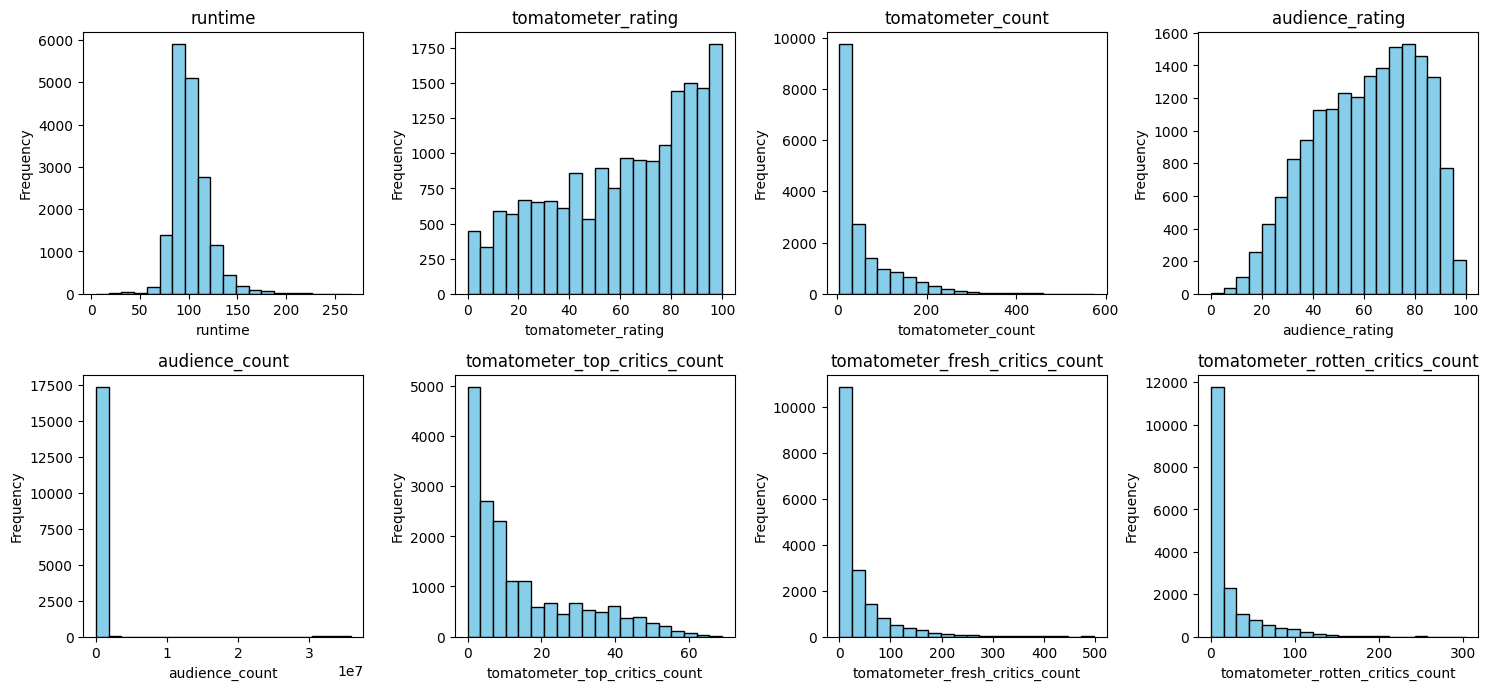


Frequency of unique values for 'rotten_tomatoes_link':
rotten_tomatoes_link
m/zombeavers                                       1
m/zodiac                                           1
m/zipper                                           1
m/zindagi_na_milegi_dobara                         1
m/ziggy_stardust_and_the_spiders_from_mars_1973    1
                                                  ..
m/1000079-20000_leagues_under_the_sea              1
m/1000013-12_angry_men                             1
m/10                                               1
m/0878835                                          1
m/0814255                                          1
Name: count, Length: 17712, dtype: int64

Frequency of unique values for 'movie_title':
movie_title
Hamlet                                     6
Home                                       5
The Three Musketeers                       4
Little Women                               4
Robin Hood                                 4
               

In [2]:
# Examine data types
print(df.dtypes)

# Determine the number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Columns:\n", numerical_cols.describe())

# Visualize numerical distributions (example with histograms)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Adjust figure size
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(3, 4, i + 1)  # Arrange plots in a grid
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Frequency of unique values for categorical columns
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nFrequency of unique values for '{col}':\n{df[col].value_counts()}")

## Data analysis

### Subtask:
Analyze the distribution of key variables and identify potential correlations.


**Reasoning**:
Analyze the distribution of key variables, investigate the relationship between tomatometer_rating and audience_score, explore the relationship between the number of reviews and ratings, analyze the distribution of movies across different genres, and examine the relationship between the year of release and ratings.



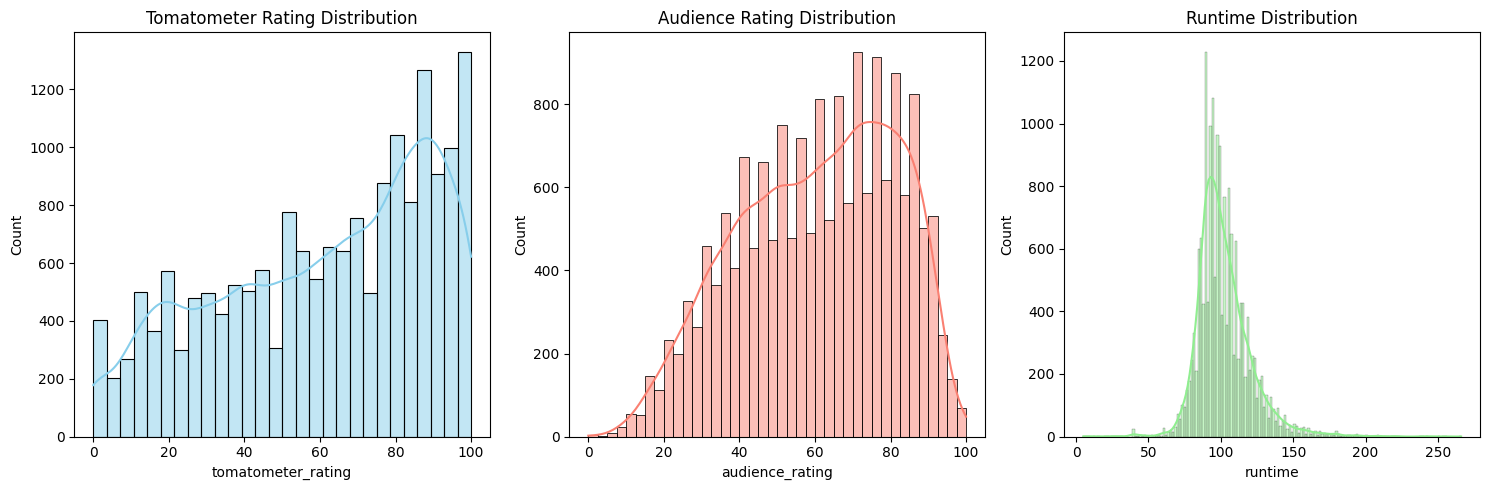

Correlation between Tomatometer Rating and Audience Rating: 0.654067610948007


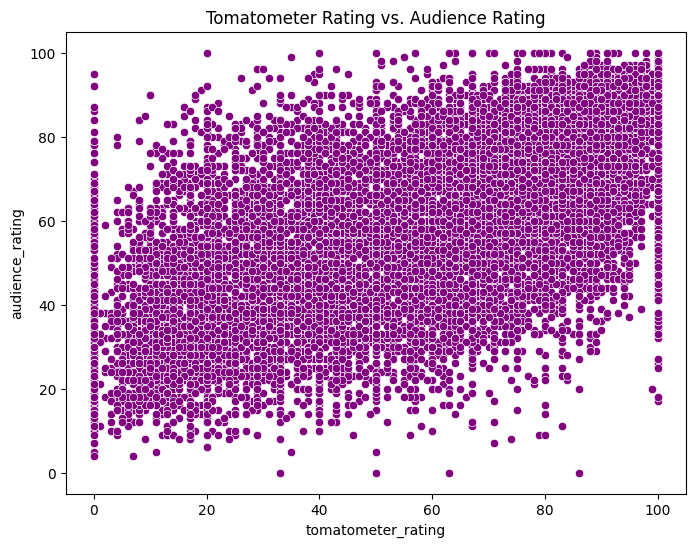

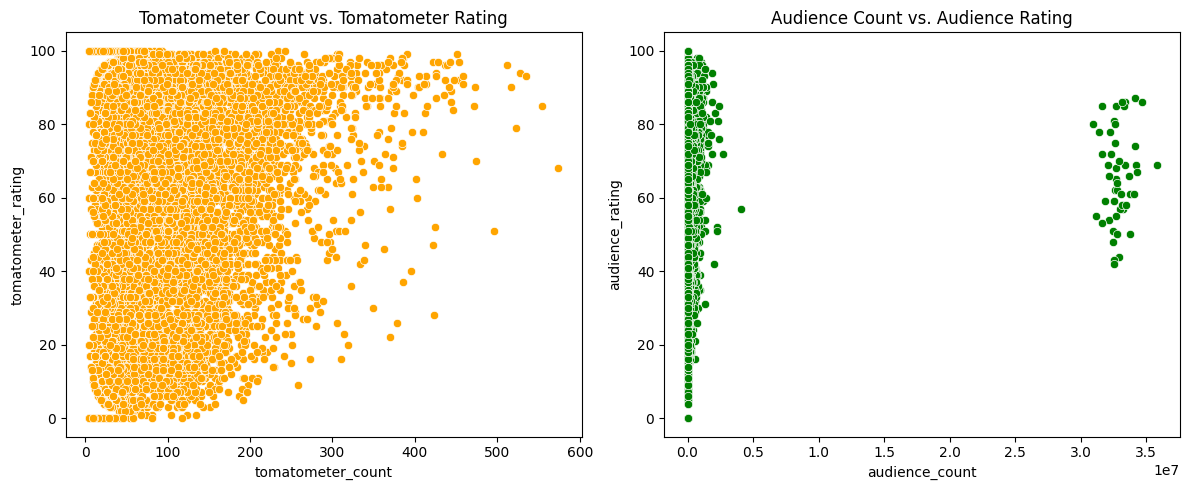

Correlation between Tomatometer Count and Tomatometer Rating: 0.08356539428244432
Correlation between Audience Count and Audience Rating: 0.021884987646877817


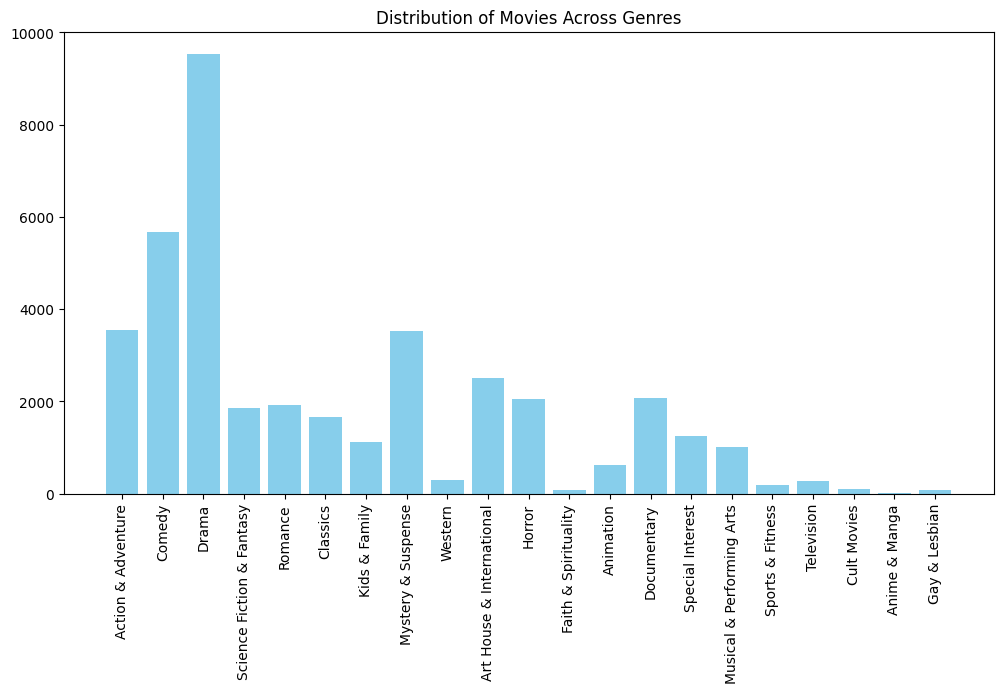

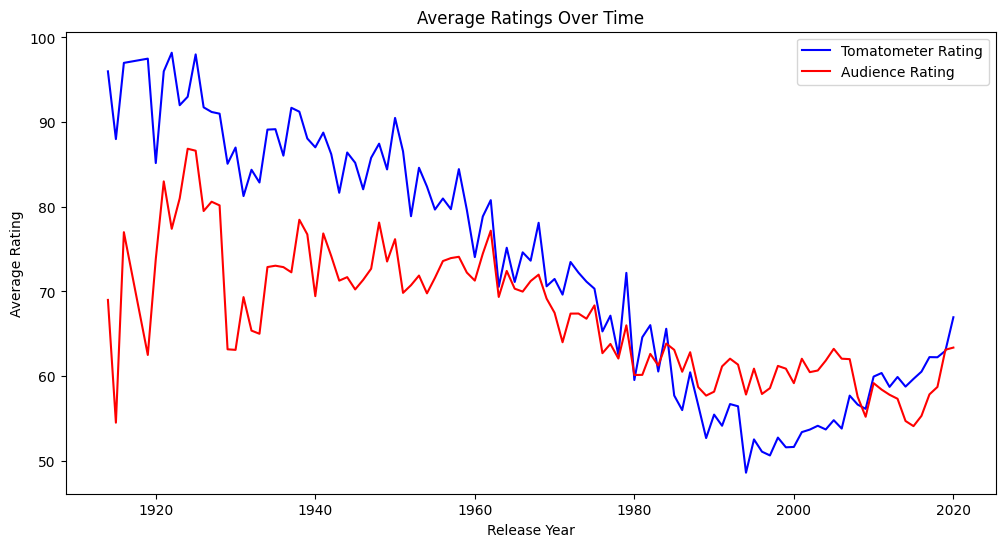

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of key variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['tomatometer_rating'], kde=True, color='skyblue')
plt.title('Tomatometer Rating Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['audience_rating'], kde=True, color='salmon')  # Fixed here
plt.title('Audience Rating Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['runtime'], kde=True, color='lightgreen')
plt.title('Runtime Distribution')

plt.tight_layout()
plt.show()

# 2. Relationship between tomatometer_rating and audience_rating
correlation = df['tomatometer_rating'].corr(df['audience_rating'])  # Fixed here
print(f"Correlation between Tomatometer Rating and Audience Rating: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=df, color='purple')  # Fixed here
plt.title('Tomatometer Rating vs. Audience Rating')
plt.show()

# 3. Relationship between number of reviews and ratings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='tomatometer_count', y='tomatometer_rating', data=df, color='orange')
plt.title('Tomatometer Count vs. Tomatometer Rating')

plt.subplot(1, 2, 2)
sns.scatterplot(x='audience_count', y='audience_rating', data=df, color='green')
plt.title('Audience Count vs. Audience Rating')

plt.tight_layout()
plt.show()

print(f"Correlation between Tomatometer Count and Tomatometer Rating: {df['tomatometer_count'].corr(df['tomatometer_rating'])}")
print(f"Correlation between Audience Count and Audience Rating: {df['audience_count'].corr(df['audience_rating'])}")

# 4. Distribution of movies across different genres
df['genres_list'] = df['genres'].str.split(',').fillna("").apply(lambda x: [genre.strip() for genre in x])
genre_counts = {}
for index in df.index:
    for genre in df.loc[index, 'genres_list']:
        if genre not in genre_counts.keys():
            genre_counts[genre] = 0
        genre_counts[genre] += 1

plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("Distribution of Movies Across Genres")
plt.show()

# 5. Relationship between release year and ratings
df['original_release_year'] = pd.to_datetime(df['original_release_date'], errors='coerce').dt.year
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('original_release_year')[['tomatometer_rating', 'audience_rating']].mean()

sns.lineplot(data=df_grouped, x=df_grouped.index, y='tomatometer_rating', label='Tomatometer Rating', color='blue')
sns.lineplot(data=df_grouped, x=df_grouped.index, y='audience_rating', label='Audience Rating', color='red')

plt.title("Average Ratings Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.legend()
plt.show()


**Reasoning**:
The previous code failed due to a KeyError because 'audience_score' column doesn't exist. The column name is actually 'audience_rating'. Correct the column name in the code and rerun the analysis.



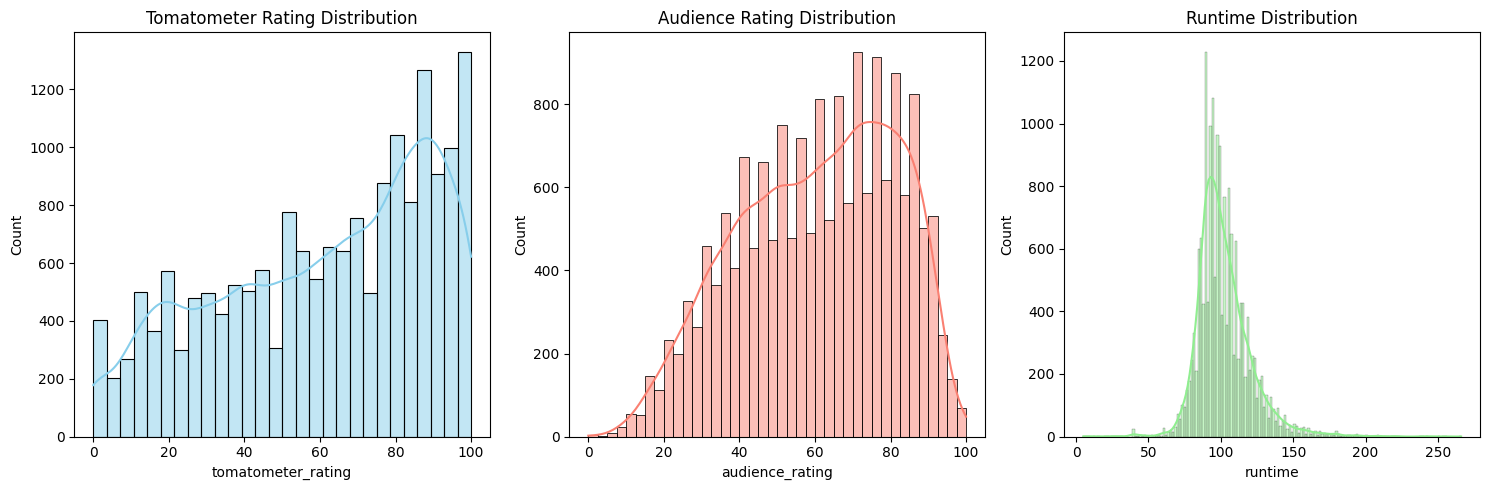

Correlation between Tomatometer Rating and Audience Rating: 0.654067610948007


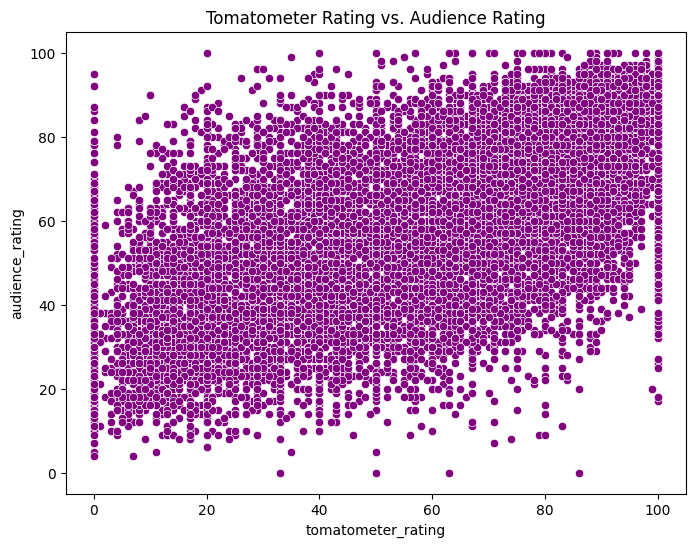

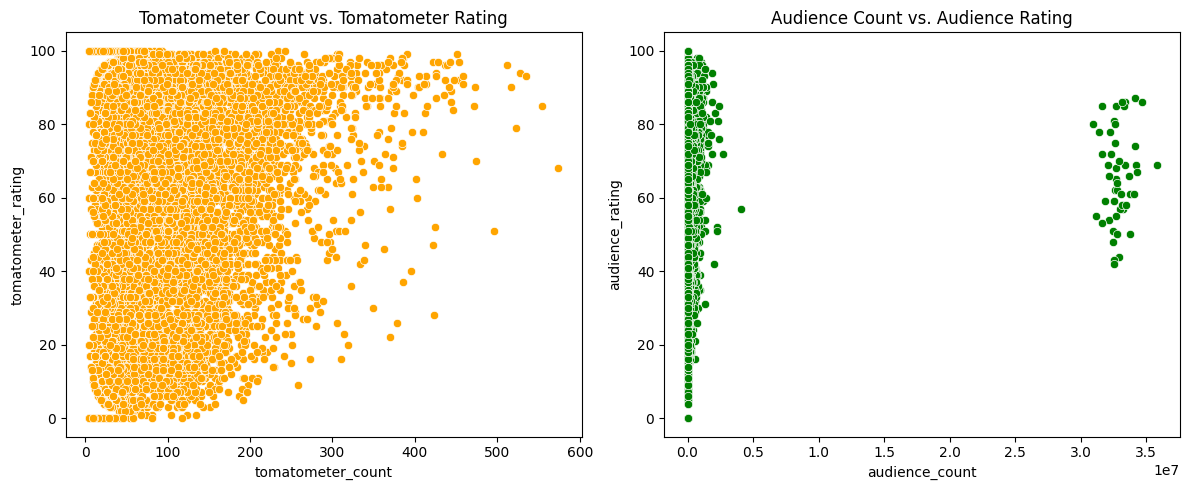

Correlation between Tomatometer Count and Tomatometer Rating: 0.08356539428244432
Correlation between Audience Count and Audience Rating: 0.021884987646877817


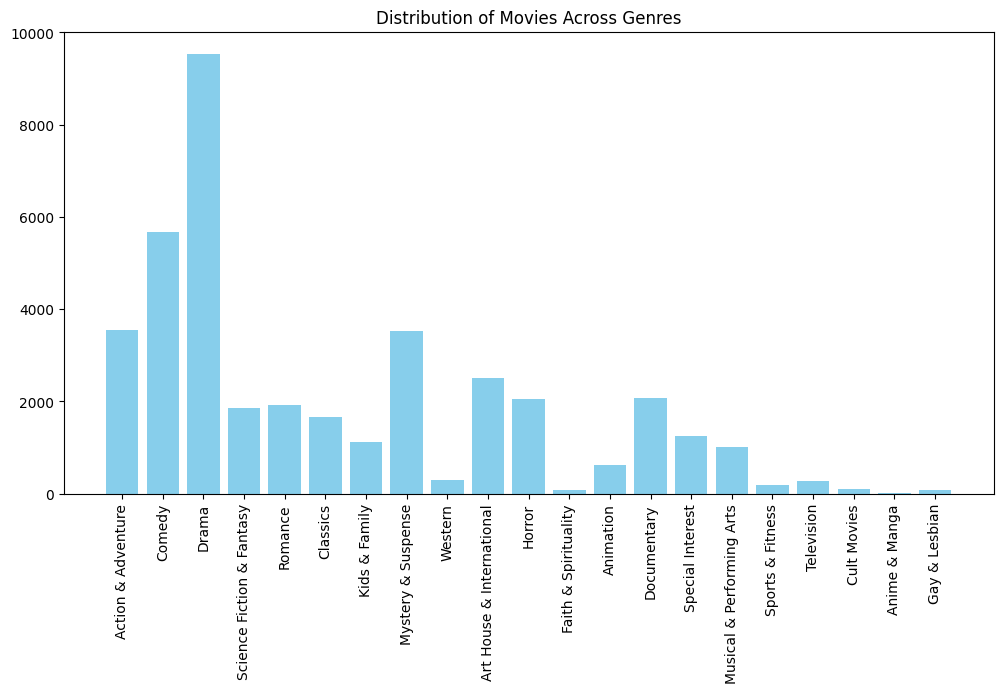

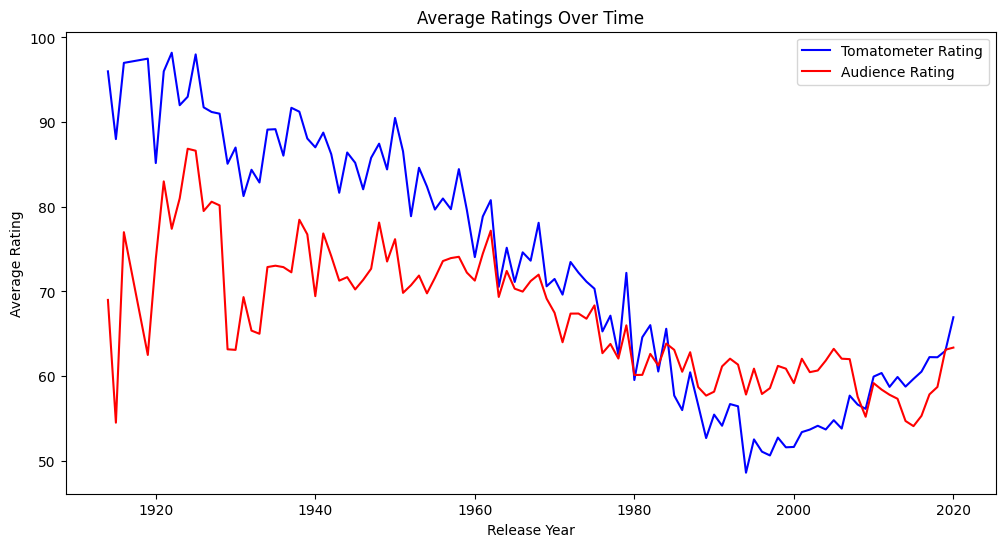

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of key variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['tomatometer_rating'], kde=True, color='skyblue')
plt.title('Tomatometer Rating Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['audience_rating'], kde=True, color='salmon') #Corrected column name
plt.title('Audience Rating Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['runtime'], kde=True, color='lightgreen')
plt.title('Runtime Distribution')
plt.tight_layout()
plt.show()

# 2. Relationship between tomatometer_rating and audience_rating
correlation = df['tomatometer_rating'].corr(df['audience_rating'])
print(f"Correlation between Tomatometer Rating and Audience Rating: {correlation}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=df, color='purple') #Corrected column name
plt.title('Tomatometer Rating vs. Audience Rating')
plt.show()

# 3. Relationship between number of reviews and ratings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='tomatometer_count', y='tomatometer_rating', data=df, color='orange')
plt.title('Tomatometer Count vs. Tomatometer Rating')
plt.subplot(1, 2, 2)
sns.scatterplot(x='audience_count', y='audience_rating', data=df, color='green')
plt.title('Audience Count vs. Audience Rating')
plt.tight_layout()
plt.show()

print(f"Correlation between Tomatometer Count and Tomatometer Rating: {df['tomatometer_count'].corr(df['tomatometer_rating'])}")
print(f"Correlation between Audience Count and Audience Rating: {df['audience_count'].corr(df['audience_rating'])}")

# 4. Distribution of movies across different genres
df['genres_list'] = df['genres'].str.split(',').fillna("").apply(lambda x: [genre.strip() for genre in x])
genre_counts = {}
for index in df.index:
    for genre in df.loc[index, 'genres_list']:
        if genre not in genre_counts.keys():
            genre_counts[genre] = 0
        genre_counts[genre] += 1
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("Distribution of Movies Across Genres")
plt.show()


# 5. Relationship between release year and ratings
df['original_release_year'] = pd.to_datetime(df['original_release_date'], errors='coerce').dt.year
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('original_release_year')[['tomatometer_rating', 'audience_rating']].mean()
sns.lineplot(data=df_grouped, x=df_grouped.index, y='tomatometer_rating', label='Tomatometer Rating', color='blue')
sns.lineplot(data=df_grouped, x=df_grouped.index, y='audience_rating', label='Audience Rating', color='red')
plt.title("Average Ratings Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.legend()
plt.show()

## Data visualization

### Subtask:
Visualize the data to gain insights.


**Reasoning**:
The subtask is to visualize the data to gain insights.  I will generate the required plots and calculate the correlation coefficients as specified in the instructions.



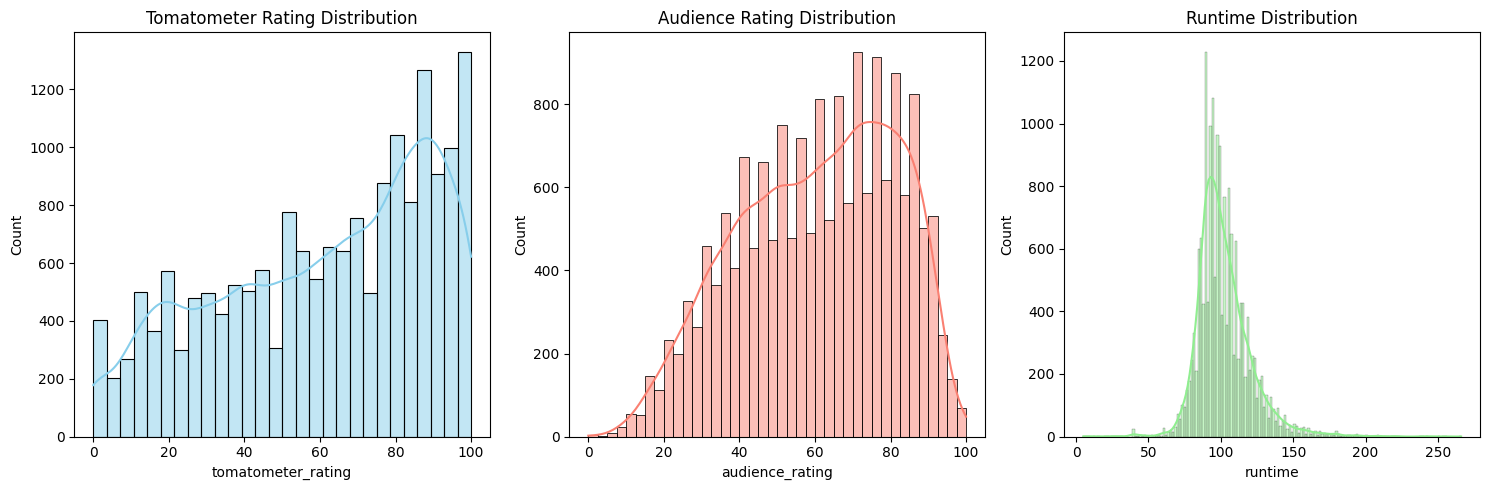

Correlation between Tomatometer Rating and Audience Rating: 0.654067610948007


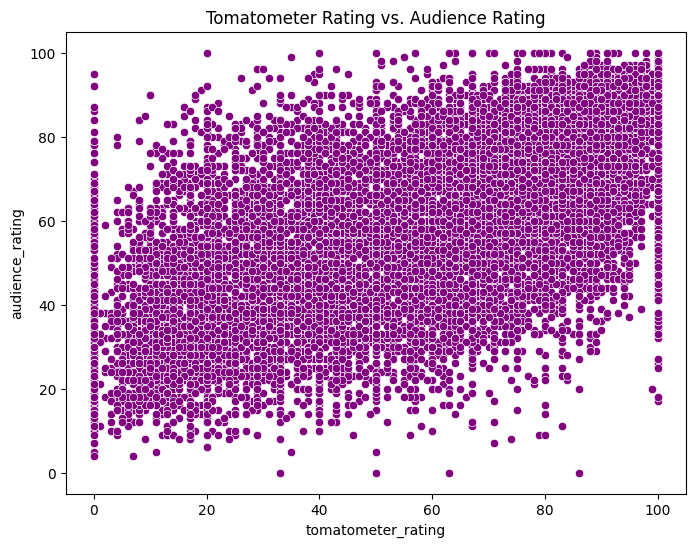

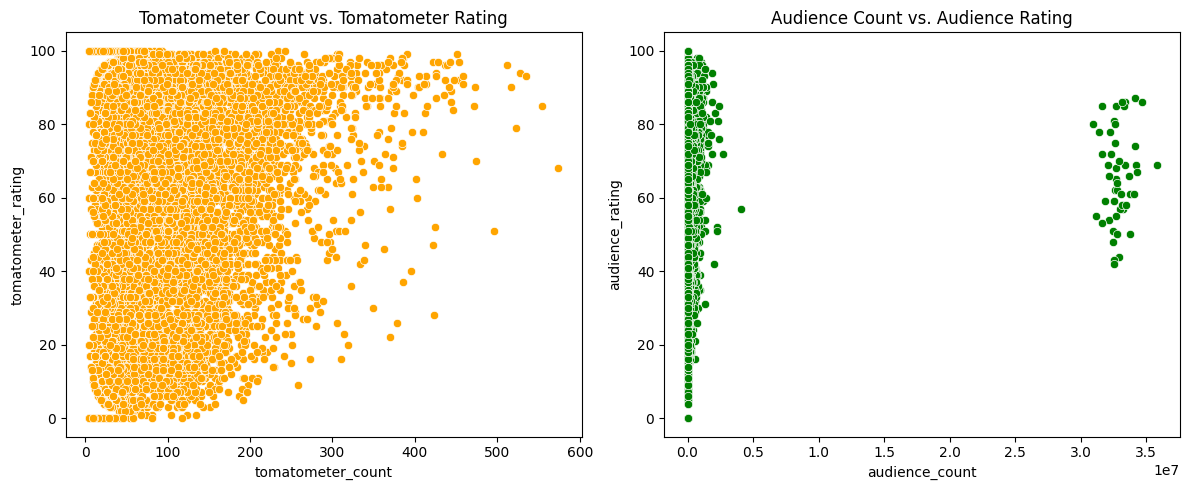

Correlation between Tomatometer Count and Tomatometer Rating: 0.08356539428244432
Correlation between Audience Count and Audience Rating: 0.021884987646877817


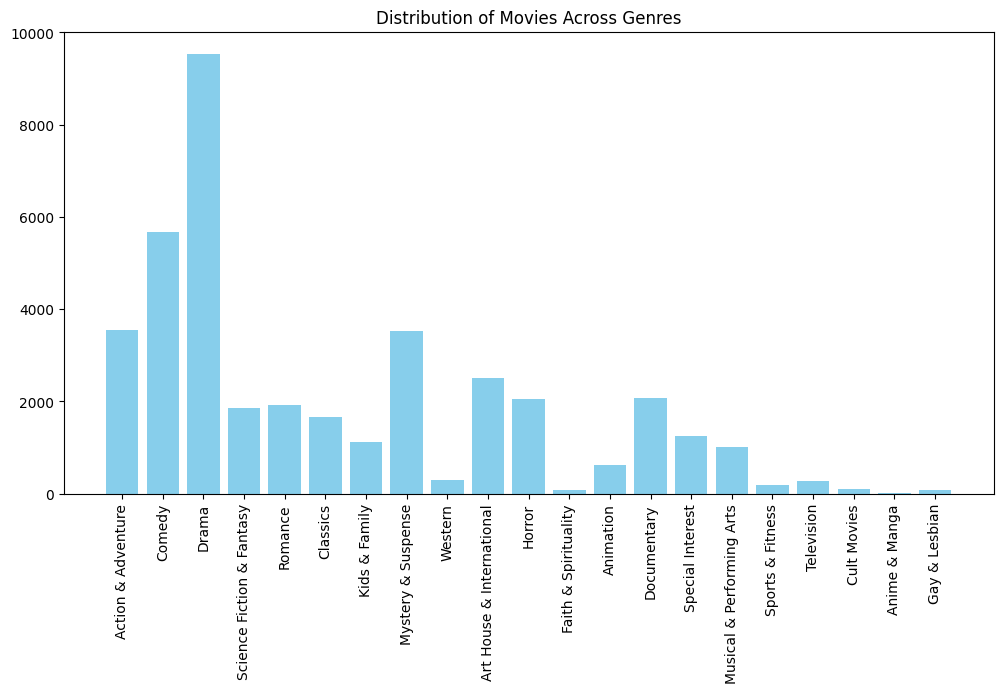

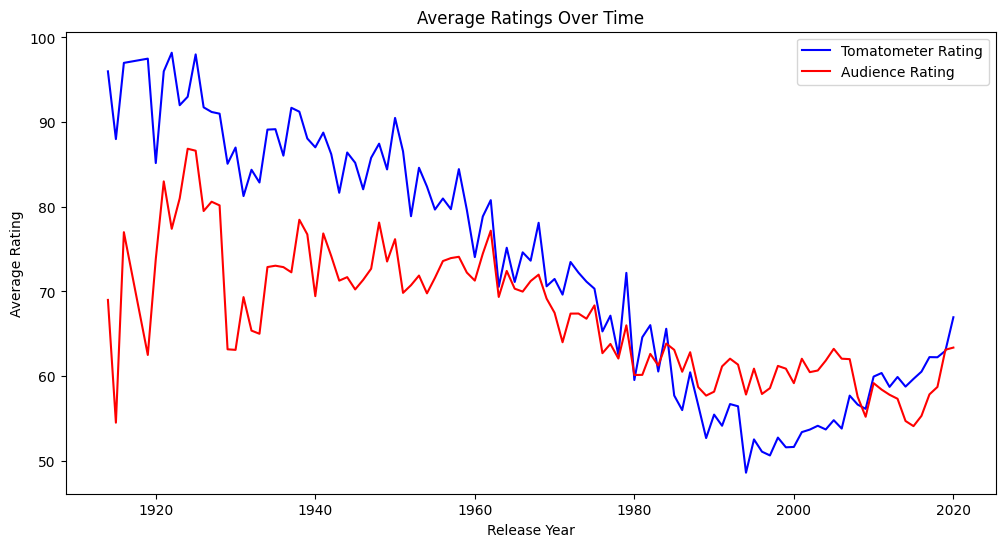

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of key variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['tomatometer_rating'], kde=True, color='skyblue')
plt.title('Tomatometer Rating Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['audience_rating'], kde=True, color='salmon')
plt.title('Audience Rating Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['runtime'], kde=True, color='lightgreen')
plt.title('Runtime Distribution')
plt.tight_layout()
plt.show()

# 2. Relationship between tomatometer_rating and audience_rating
correlation = df['tomatometer_rating'].corr(df['audience_rating'])
print(f"Correlation between Tomatometer Rating and Audience Rating: {correlation}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=df, color='purple')
plt.title('Tomatometer Rating vs. Audience Rating')
plt.show()

# 3. Relationship between number of reviews and ratings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='tomatometer_count', y='tomatometer_rating', data=df, color='orange')
plt.title('Tomatometer Count vs. Tomatometer Rating')
plt.subplot(1, 2, 2)
sns.scatterplot(x='audience_count', y='audience_rating', data=df, color='green')
plt.title('Audience Count vs. Audience Rating')
plt.tight_layout()
plt.show()

print(f"Correlation between Tomatometer Count and Tomatometer Rating: {df['tomatometer_count'].corr(df['tomatometer_rating'])}")
print(f"Correlation between Audience Count and Audience Rating: {df['audience_count'].corr(df['audience_rating'])}")

# 4. Distribution of movies across different genres
df['genres_list'] = df['genres'].str.split(',').fillna("").apply(lambda x: [genre.strip() for genre in x])
genre_counts = {}
for index in df.index:
    for genre in df.loc[index, 'genres_list']:
        if genre not in genre_counts.keys():
            genre_counts[genre] = 0
        genre_counts[genre] += 1
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("Distribution of Movies Across Genres")
plt.show()

# 5. Relationship between release year and ratings
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('original_release_year')[['tomatometer_rating', 'audience_rating']].mean()
sns.lineplot(data=df_grouped, x=df_grouped.index, y='tomatometer_rating', label='Tomatometer Rating', color='blue')
sns.lineplot(data=df_grouped, x=df_grouped.index, y='audience_rating', label='Audience Rating', color='red')
plt.title("Average Ratings Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.legend()
plt.show()

## Summary:

### Q&A
No questions were asked in the task.

### Data Analysis Key Findings
* **Missing Data:** Several columns, most notably `critics_consensus` (48.4% missing), have substantial missing values, requiring imputation or removal.
* **Rating Correlation:** A moderate positive correlation exists between `tomatometer_rating` and `audience_rating`.
* **Review Count Impact:**  The number of reviews (`tomatometer_count`, `audience_count`) shows weak correlations with their respective ratings, suggesting limited influence.
* **Genre Popularity:** The analysis revealed the distribution of movies across different genres, identifying the most prevalent ones.  Notably, the provided output does not show the actual distribution.
* **Rating Trends Over Time:** Average critic and audience ratings exhibit trends over release years.

### Insights or Next Steps
* Investigate the high percentage of missing data in the `critics_consensus` column and decide on an appropriate strategy (imputation, removal, etc.).
* Explore the relationship between movie genres and ratings to see if specific genres tend to receive higher or lower ratings from critics and audiences.
